# Praxisbeispiel - Telko Vertragskundenabgang-Vorhersage MIT simulierten Kunden-Service-Daten

Die Vorhersage der Kundenabwanderung (bei Vertragssituationen) sagt die Wahrscheinlichkeit voraus, dass Kunden die Produkte oder Dienstleistungen eines Unternehmens kündigen. 
In den meisten Fällen sind Unternehmen mit Stammkunden oder Kunden im Abonnement bestrebt, ihren Kundenstamm zu erhalten. Daher ist es wichtig, die Kunden zu verfolgen, die ihr Abonnement kündigen, und diejenigen, die den Dienst weiter nutzen. Dieser Ansatz setzt voraus, dass das Unternehmen das Verhalten seiner Kunden kennt und versteht und die Eigenschaften, die zu dem Risiko führen, dass der Kunde das Unternehmen verlässt. 


## Szenario

Annahme: Wir sind ein Telekommunikations-Unternehmen, das über historische Daten darüber verfügt, wie seine Kunden mit seinen Dienstleistungen interagiert haben. Das Unternehmen möchte wissen, wie hoch die Wahrscheinlichkeit ist, dass Kunden abwandern, damit es gezielte Marketingkampagnen starten kann.


## Datensatz 

1. Wir nutzen den Kaggle-Datensatz als die Baseline der Kundeninformationen: 
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
2. Wir nutzen einen selbst simulierten Datensatz bzgl. Kunden-Service, das vorher in diesem Folder abgespeichert wurde: kunden_service.csv

In [ ]:
import sys
# !{sys.executable} -m pip install kagglehub
# !{sys.executable} -m pip install @
# !{sys.executable} -m pip install missingno

In [ ]:
# import kagglehub


In [1]:
import pandas as pd
import numpy as np
# import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier


In [ ]:
# Download data from Kaggle
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to files:", path)

In [3]:
path_file = "/Users/minye/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv"
print(path_file)

/Users/minye/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Daten laden

In [4]:
df_ori = pd.read_csv(path_file)
df_ori

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
path_kunden_service_log = "kunden_service.csv"
df_service = pd.read_csv(path_kunden_service_log)
df_service

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id
0,7590-VHVEG_T1,7590-VHVEG,2024-12-03 00:00:00,2024-12-03 03:27:14,Email,Frage zum Vertrag,Problem gelöst,True,True,NaN
1,7590-VHVEG_T1,7590-VHVEG,2024-12-03 03:27:14,2024-12-04 21:31:13,Social Media,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,7590-VHVEG_T1
2,7590-VHVEG_T1,7590-VHVEG,2024-12-04 21:31:13,2024-12-05 13:12:06,Email,Beschwerde über Kundenservice,Ticket geschlossen,True,False,7590-VHVEG_T1
3,5575-GNVDE_T1,5575-GNVDE,2024-06-18 00:00:00,2024-06-19 23:03:43,Email,Problem mit Rechnung,Anfrage wird bearbeitet,False,True,NaN
4,5575-GNVDE_T1,5575-GNVDE,2024-06-20 23:03:43,2024-06-20 23:21:41,Hotline,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,5575-GNVDE_T1
...,...,...,...,...,...,...,...,...,...,...
28148,6840-RESVB_T1,6840-RESVB,2024-03-18 20:03:20,2024-03-18 23:24:42,Email,Beschwerde über Kundenservice,Ticket geschlossen,True,False,6840-RESVB_T1
28149,4801-JZAZL_T1,4801-JZAZL,2024-08-11 00:00:00,2024-08-11 11:26:24,Hotline,Problem mit Rechnung,Ticket geschlossen,True,True,NaN
28150,4801-JZAZL_T1,4801-JZAZL,2024-08-11 11:26:24,2024-08-12 13:54:33,Email,Problem mit Rechnung,Anfrage wird bearbeitet,False,False,4801-JZAZL_T1
28151,8361-LTMKD_T1,8361-LTMKD,2024-10-16 00:00:00,2024-10-16 17:35:16,On-site,Problem mit Rechnung,Problem gelöst,True,True,NaN


## Daten Manipulation / Bereinigung

### Original Kunden-Datensatz

In [6]:
df_ori['TotalCharges'] = pd.to_numeric(df_ori.TotalCharges, errors='coerce')

In [7]:
df_ori.drop(labels=df_ori[df_ori['tenure'] == 0].index, axis=0, inplace=True)
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_ori.reset_index(inplace=True) 
df_ori.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
if "index" in df_ori:
    df_ori.drop("index", axis=1, inplace=True) 
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Kunden-IDs? 


**Achtung!**
Die customerIDs können jetzt nicht so schnell verworfen werden! Die brauchen wir, um die beiden Tabellen miteinander zu verknüpfen! 

#### Kategorische Spalten umwandeln
Um die kategorischen Spalten richtig in numerische Spalten umzuwandeln, lass uns sie genauer anschauen und identifizieren, was sich hinter den Strings wirklich verbirgt. 

### DatenAnalyse:


binary: 
gender, 

boolean: 
SeniorCitizen, Partner, Dependents, PhoneService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling

categorical:
MultipleLines, InternetService, Contract, PaymentMethod

numeric:
tenure, MonthlyCharges, TotalCharges

### Unterteile die Columns in 3 Kategorien: Standardisierung, Ordinal-Encoding and One-Hot-Encoding

**binary** (direkte Umwandlung zu 0-1): 
gender

**boolean** (direkte Umwandlung zu 0-1): 
SeniorCitizen, Partner, Dependents, PhoneService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling

**categorical** (One-Hot oder Frequency Encoding etc):
MultipleLines, InternetService, Contract, PaymentMethod

**numeric**:
tenure, MonthlyCharges, TotalCharges

In [10]:
cols_ori_binary = ['gender']
cols_ori_boolean = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
cols_ori_cat = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
cols_ori_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
# Mapping von "Female" zu 1 und "Male" zu 0

df_ori['gender'] = df_ori['gender'].map({'Female': 1, 'Male': 0})
df_ori['gender']

0       1
1       0
2       0
3       0
4       1
       ..
7027    0
7028    1
7029    1
7030    0
7031    0
Name: gender, Length: 7032, dtype: int64

In [12]:
for col in cols_ori_boolean: 
    df_ori[col] = df_ori[col].eq('yes').mul(1)

df_ori[cols_ori_boolean]

,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,0,0,0,0,0,0,0
7028,0,0,0,0,0,0,0,0,0,0,0
7029,0,0,0,0,0,0,0,0,0,0,0
7030,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# One-Hot-Encoding für die drei kategorischen Spalten
df_onehot_encoded = pd.get_dummies(df_ori, columns=cols_ori_cat) # dtype=int

print(df_onehot_encoded.shape)
df_onehot_encoded
    

(7032, 30)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,False,True,False,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,True,False,False,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,True,False,False,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,False,True,False,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,True,False,False,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,No,False,False,True,True,False,False,False,True,False,False,False,False,True
7028,2234-XADUH,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,False,False,True,False,True,False,False,True,False,False,True,False,False
7029,4801-JZAZL,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,No,False,True,False,True,False,False,True,False,False,False,False,True,False
7030,8361-LTMKD,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,Yes,False,False,True,False,True,False,True,False,False,False,False,False,True


In [14]:
df_onehot_encoded.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [15]:
index_label = df_onehot_encoded.columns.tolist().index('Churn')
print(df_ori.columns.tolist()[index_label])

cols_onehot_encoded = df_onehot_encoded.columns.tolist()[index_label+1:]
print(len(cols_onehot_encoded))
cols_onehot_encoded

PaperlessBilling
13


['MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [16]:
for col in cols_onehot_encoded: 
    df_onehot_encoded[col] = df_onehot_encoded[col].eq('yes').mul(1)

In [17]:
df_onehot_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0
7028,2234-XADUH,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,0,0,0,0,0,0,0,0,0,0,0,0,0
7029,4801-JZAZL,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,No,0,0,0,0,0,0,0,0,0,0,0,0,0
7030,8361-LTMKD,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0


## Kunden-Service Datensatz

Würden wir einen echten Kunden-Service Datensatz erhalten, müssten wir ihn genau so aufmerksam kontrollieren und checken, ob es missing fields gibt, etc. 


In [18]:
df_service.head()

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id
0,7590-VHVEG_T1,7590-VHVEG,2024-12-03 00:00:00,2024-12-03 03:27:14,Email,Frage zum Vertrag,Problem gelöst,True,True,NaN
1,7590-VHVEG_T1,7590-VHVEG,2024-12-03 03:27:14,2024-12-04 21:31:13,Social Media,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,7590-VHVEG_T1
2,7590-VHVEG_T1,7590-VHVEG,2024-12-04 21:31:13,2024-12-05 13:12:06,Email,Beschwerde über Kundenservice,Ticket geschlossen,True,False,7590-VHVEG_T1
3,5575-GNVDE_T1,5575-GNVDE,2024-06-18 00:00:00,2024-06-19 23:03:43,Email,Problem mit Rechnung,Anfrage wird bearbeitet,False,True,NaN
4,5575-GNVDE_T1,5575-GNVDE,2024-06-20 23:03:43,2024-06-20 23:21:41,Hotline,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,5575-GNVDE_T1


#### Datentyp Check

In [19]:
df_service.dtypes

ticket_id             object
customer_id           object
time_request          object
time_reply            object
channel               object
request               object
reply                 object
solved                  bool
original_request        bool
original_ticket_id    object
dtype: object

In [20]:
# Die datetime-Spalten müssen in deren Typ angepasst werden, alles andere kann in deren Original-Form bleiben (string)

df_service['time_request'] = pd.to_datetime(df_service['time_request'], errors="coerce")
df_service['time_reply'] = pd.to_datetime(df_service['time_reply'], errors="coerce")
df_service.dtypes

ticket_id                     object
customer_id                   object
time_request          datetime64[ns]
time_reply            datetime64[ns]
channel                       object
request                       object
reply                         object
solved                          bool
original_request                bool
original_ticket_id            object
dtype: object

In [21]:
df_service.isnull().sum()

ticket_id                 0
customer_id               0
time_request              0
time_reply                0
channel                   0
request                   0
reply                     0
solved                    0
original_request          0
original_ticket_id    14140
dtype: int64

Die große Anzahl an null-Werten in der original_ticket_id-Spalte sind in diesem Datensatz kein Fehler, sondern einleuchtend in der Logik (das wissen wir - haben wir selbst kreiert). 

Daher werden hier keine Daten gelöscht, sondern wir würden die leeren Datenfelder extrapolieren. 

Da es sich in dieser Spalte um alphanumerischen IDs handelt, ist die naheliegendste Lösung einen leeren String zu machen. Es ist keine Option, sie bei null zu belassen, da die Funktionen in den follow-up Schritten eine vollständig gefüllte Spalte benötigen.

In [22]:
df_service["original_ticket_id"].fillna("", inplace=True)

In [23]:
df_service.isnull().sum()

ticket_id             0
customer_id           0
time_request          0
time_reply            0
channel               0
request               0
reply                 0
solved                0
original_request      0
original_ticket_id    0
dtype: int64

In [24]:
# Dann wollen wir checken, ob es irgendein Datum gibt, das nach dem Stichtag ist 
df_service['time_request'].max()

Timestamp('2024-12-31 23:58:29')

In [25]:
df_service['time_reply'].max()

Timestamp('2024-12-31 23:59:39')

#### Logische Fehler Check

In [26]:
# Zudem wollen wir kontrollieren, ob es Fehler in der Logik gibt, z.b. time_reply vor time_request

df_service[df_service['time_reply']<df_service['time_request']]

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id


In [27]:
df_service.head()

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id
0,7590-VHVEG_T1,7590-VHVEG,2024-12-03 00:00:00,2024-12-03 03:27:14,Email,Frage zum Vertrag,Problem gelöst,True,True,
1,7590-VHVEG_T1,7590-VHVEG,2024-12-03 03:27:14,2024-12-04 21:31:13,Social Media,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,7590-VHVEG_T1
2,7590-VHVEG_T1,7590-VHVEG,2024-12-04 21:31:13,2024-12-05 13:12:06,Email,Beschwerde über Kundenservice,Ticket geschlossen,True,False,7590-VHVEG_T1
3,5575-GNVDE_T1,5575-GNVDE,2024-06-18 00:00:00,2024-06-19 23:03:43,Email,Problem mit Rechnung,Anfrage wird bearbeitet,False,True,
4,5575-GNVDE_T1,5575-GNVDE,2024-06-20 23:03:43,2024-06-20 23:21:41,Hotline,Internet funktioniert nicht,Anfrage wird bearbeitet,False,False,5575-GNVDE_T1


## EDA - Explorative Data Analysis (Daten Exploration)

Die EDA (Explorative Daten Analysis) des df_ori lassen wir in diesem Notebook aus, da wir es im letzten Notebook ausgiebig besprochen haben

####  EDA df_service

In [28]:
df_service.value_counts("channel", ascending=False)

channel
On-site         5741
Chat            5653
Social Media    5607
Hotline         5602
Email           5550
Name: count, dtype: int64

In [29]:
df_service.value_counts("request")

request
Internet funktioniert nicht      5755
Problem mit Rechnung             5659
Frage zum Vertrag                5602
Beschwerde über Kundenservice    5579
Technische Störung               5558
Name: count, dtype: int64

In [30]:
df_service[["request","reply"]].groupby(["request"]).value_counts(ascending=False)

request                        reply                         
Beschwerde über Kundenservice  Weitere Informationen benötigt    1402
                               Anfrage wird bearbeitet           1397
                               Problem gelöst                    1394
                               Ticket geschlossen                1386
Frage zum Vertrag              Ticket geschlossen                1442
                               Weitere Informationen benötigt    1436
                               Anfrage wird bearbeitet           1397
                               Problem gelöst                    1327
Internet funktioniert nicht    Anfrage wird bearbeitet           1476
                               Problem gelöst                    1461
                               Ticket geschlossen                1419
                               Weitere Informationen benötigt    1399
Problem mit Rechnung           Ticket geschlossen                1461
                            

In [31]:
df_service.value_counts("solved", ascending=False)

solved
False    14144
True     14009
Name: count, dtype: int64

In [32]:
df_service[["request","solved"]].groupby(["request"]).value_counts(ascending=False)

request                        solved
Beschwerde über Kundenservice  False     2799
                               True      2780
Frage zum Vertrag              False     2833
                               True      2769
Internet funktioniert nicht    True      2880
                               False     2875
Problem mit Rechnung           True      2856
                               False     2803
Technische Störung             False     2834
                               True      2724
Name: count, dtype: int64

<Axes: xlabel='time_request'>

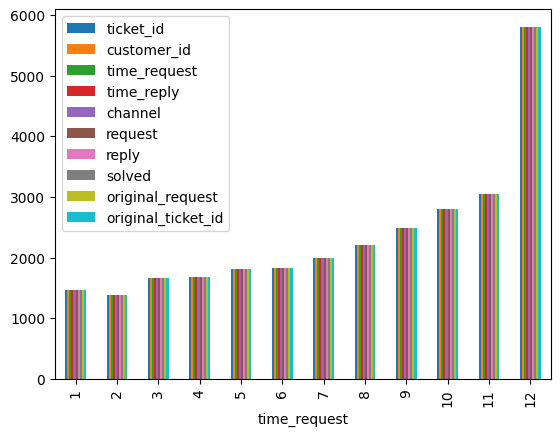

In [33]:
df_service.groupby(df_service["time_request"].dt.month).count().plot(kind="bar")


<Axes: xlabel='time_reply'>

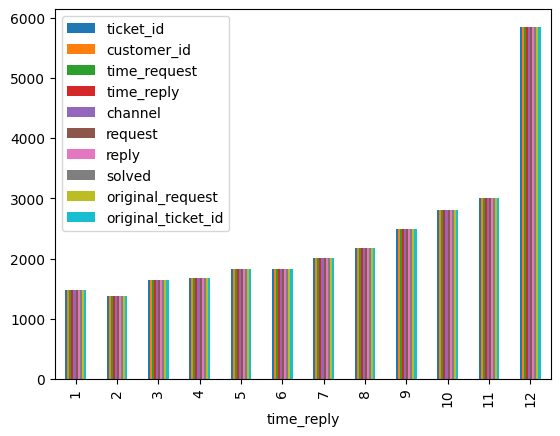

In [34]:
df_service.groupby(df_service["time_reply"].dt.month).count().plot(kind="bar")


## Feature Engineering

In [35]:
# Definiere den Stichtag für die Features
stichtag = pd.to_datetime("2024-12-31")

# Wir werden viele verschiedene Features erstellen, diese werden erst gesammelt und später zum DataFrame umgewandelt
dict_features = {}

### Feature-Gruppe 1: Anzahl der Requests im letzten Monat

In [36]:
# Definiere den Cutoff für die letzten 1 Monat
cutoff_1m = stichtag - pd.DateOffset(months=1)

# Filtere die Anfragen, die ab dem Cutoff bis zum Stichtag erfolgen
recent_requests = df_service[df_service['time_request'] >= cutoff_1m]

# Zähle pro Kunde die Anzahl der Requests
num_request_last_1m = recent_requests.groupby('customer_id').size().rename('num_request_last_1_month')

# Ausgabe: Beispieldatensatz
print(num_request_last_1m.head())

customer_id
0013-EXCHZ    6
0015-UOCOJ    1
0021-IKXGC    8
0023-HGHWL    3
0030-FNXPP    3
Name: num_request_last_1_month, dtype: int64


In [37]:
# Anzahl Requests in den letzten 6, 9 etc Monaten

months_interest = [1, 3, 6, 12]

for mon in months_interest:
    # Definiere den Cutoff für die letzten 3 Monate
    cutoff = stichtag - pd.DateOffset(months=mon)
    
    # Filtere die Anfragen, die ab dem Cutoff bis zum Stichtag erfolgen
    recent_requests = df_service[df_service['time_request'] >= cutoff]
    
    # Zähle pro Kunde die Anzahl der Requests
    col_new = "num_request_last_"+str(mon)+"_months"
    num_request_period = recent_requests.groupby('customer_id').size().rename(col_new)
    
    # Füge das Ergebnis dem features_df hinzu. Da die customer_ids als Index genutzt werden, eignet sich join()
    # df_features = df_features.join(num_request_period, how='left')
    dict_features[col_new] = num_request_period

print(dict_features.keys())
dict_features

dict_keys(['num_request_last_1_months', 'num_request_last_3_months', 'num_request_last_6_months', 'num_request_last_12_months'])


{'num_request_last_1_months': customer_id
 0013-EXCHZ    6
 0015-UOCOJ    1
 0021-IKXGC    8
 0023-HGHWL    3
 0030-FNXPP    3
              ..
 9972-NKTFD    1
 9975-SKRNR    3
 9985-MWVIX    3
 9986-BONCE    3
 9992-UJOEL    1
 Name: num_request_last_1_months, Length: 1375, dtype: int64,
 'num_request_last_3_months': customer_id
 0003-MKNFE    3
 0004-TLHLJ    3
 0013-EXCHZ    9
 0015-UOCOJ    1
 0018-NYROU    1
              ..
 9986-BONCE    9
 9987-LUTYD    3
 9992-RRAMN    3
 9992-UJOEL    1
 9995-HOTOH    2
 Name: num_request_last_3_months, Length: 2335, dtype: int64,
 'num_request_last_6_months': customer_id
 0002-ORFBO     1
 0003-MKNFE     4
 0004-TLHLJ     3
 0013-EXCHZ     9
 0013-MHZWF     4
               ..
 9986-BONCE    11
 9987-LUTYD     8
 9992-RRAMN     6
 9992-UJOEL     1
 9995-HOTOH     2
 Name: num_request_last_6_months, Length: 3186, dtype: int64,
 'num_request_last_12_months': customer_id
 0002-ORFBO     3
 0003-MKNFE     4
 0004-TLHLJ     3
 0011-IGKFF     1
 

## Feature-Gruppe 2 & 3: Zeit bis Lösung und Anzahl der Thread-Iterationen pro Ticket

Hierfür müssen wir zuerst nach Ticket-ID gruppieren, um pro Ticket den Zeitraum von der ursprünglichen Anfrage bis zur ersten als gelöst markierten Antwort zu bestimmen.

Falls ein Ticket nie als gelöst markiert wurde, ignorieren wir es in der Berechnung.

In [38]:
def compute_ticket_metrics(ticket):
    """
    Für ein Ticket (alle Interaktionen mit gleicher ticket_id):
      - Ermittle die Zeitdifferenz (in Tagen) zwischen der ersten Anfrage und der ersten Antwort, die das Ticket als gelöst markiert.
      - Bestimme die Anzahl der Interaktionen (Thread-Iterationen) bis zur Lösung.
    """
    ticket_sorted = ticket.sort_values('time_request')
    
    # Die erste Anfrage (wir gehen davon aus, dass die erste Zeile die originale Anfrage ist)
    orig_time = ticket_sorted.iloc[0]['time_request']
    
    # Finde die erste Interaktion, bei der solved True ist
    solved_interactions = ticket_sorted[ticket_sorted['solved'] == True]

    if len(solved_interactions) > 0:
        solved_time = solved_interactions.iloc[0]['time_reply']
        days_to_solution = (solved_time - orig_time).days
        # Ermittle die Position (Index im sortierten Ticket), beginnend bei 1
        thread_count = ticket_sorted.reset_index().index[ticket_sorted.reset_index()['solved'] == True][0] + 1
    else:
        days_to_solution = np.nan
        thread_count = np.nan
    return pd.Series({'days_to_solution': days_to_solution, 'thread_count': thread_count})

In [39]:
# Berechne Ticket-Metriken pro Ticket
ticket_metrics = df_service.groupby('ticket_id').apply(compute_ticket_metrics)
ticket_metrics.head()

,days_to_solution,thread_count
ticket_id,,
0002-ORFBO_T1,0.0,1.0
0003-MKNFE_T1,NaN,NaN
0003-MKNFE_T2,0.0,1.0
0004-TLHLJ_T1,0.0,1.0
0011-IGKFF_T1,NaN,NaN


In [40]:
df_service[df_service["ticket_id"]=="0003-MKNFE_T1"]

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id
13701,0003-MKNFE_T1,0003-MKNFE,2024-08-08,2024-08-09 11:28:34,On-site,Beschwerde über Kundenservice,Anfrage wird bearbeitet,False,True,


In [41]:
# Füge die customer_id (die für alle Interaktionen in einem Ticket gleich ist) hinzu
ticket_customer = df_service.groupby('ticket_id')['customer_id'].first().to_frame()
ticket_metrics = ticket_metrics.merge(ticket_customer, left_index=True, right_index=True)
ticket_metrics

,days_to_solution,thread_count,customer_id
ticket_id,,,
0002-ORFBO_T1,0.0,1.0,0002-ORFBO
0003-MKNFE_T1,NaN,NaN,0003-MKNFE
0003-MKNFE_T2,0.0,1.0,0003-MKNFE
0004-TLHLJ_T1,0.0,1.0,0004-TLHLJ
0011-IGKFF_T1,NaN,NaN,0011-IGKFF
...,...,...,...
9992-RRAMN_T3,1.0,1.0,9992-RRAMN
9992-UJOEL_T1,NaN,NaN,9992-UJOEL
9993-LHIEB_T1,1.0,1.0,9993-LHIEB


In [42]:
# Aggregiere pro Kunde (nur Tickets, die gelöst wurden)
avg_days_till_solution = ticket_metrics.groupby('customer_id')['days_to_solution'].mean().rename('avg_days_till_solution')
avg_thread_till_solution = ticket_metrics.groupby('customer_id')['thread_count'].mean().rename('avg_thread_till_solution')

print(avg_days_till_solution.head())
print(avg_thread_till_solution.head())

customer_id
0002-ORFBO    0.0
0003-MKNFE    0.0
0004-TLHLJ    0.0
0011-IGKFF    NaN
0013-EXCHZ    1.0
Name: avg_days_till_solution, dtype: float64
customer_id
0002-ORFBO    1.00
0003-MKNFE    1.00
0004-TLHLJ    1.00
0011-IGKFF     NaN
0013-EXCHZ    1.25
Name: avg_thread_till_solution, dtype: float64


In [43]:
dict_features["avg_num_days_till_solution"] = avg_days_till_solution
dict_features["avg_num_thread_till_solution"] = avg_thread_till_solution

In [44]:
dict_features.keys()

dict_keys(['num_request_last_1_months', 'num_request_last_3_months', 'num_request_last_6_months', 'num_request_last_12_months', 'avg_num_days_till_solution', 'avg_num_thread_till_solution'])

### Feature-Gruppe 4 & 5: Zuletzt benutzter Kanal und am häufigsten genutzter Kanal in den letzten 6 Monaten

In [45]:
# Last channel used: Finde pro Kunde die letzte Interaktion (Sortierung nach time_request)
last_channel = df_service.sort_values('time_request').groupby('customer_id').last()['channel'].rename('last_channel_used')

# den meist genutzten Channel in letzten 6 Monaten
# zuerst den Zeitraum auf die letzten 6 Monate eingrenzen
cutoff_6m = stichtag - pd.DateOffset(months=6)
channels_last_6m = df_service[df_service['time_request'] >= cutoff_6m]

# Bestimme pro Kunde den am häufigsten auftretenden Kanal in diesem Zeitraum. Falls es mehrere Modi gibt, nimm den ersten.
channel_most_used_last6mo = channels_last_6m.groupby('customer_id')['channel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)\
                                   .rename('channel_used_most_last_6_months')

print(last_channel.head())
print(channel_most_used_last6mo.head())

customer_id
0002-ORFBO         Hotline
0003-MKNFE    Social Media
0004-TLHLJ    Social Media
0011-IGKFF    Social Media
0013-EXCHZ           Email
Name: last_channel_used, dtype: object
customer_id
0002-ORFBO    Hotline
0003-MKNFE      Email
0004-TLHLJ       Chat
0013-EXCHZ       Chat
0013-MHZWF    On-site
Name: channel_used_most_last_6_months, dtype: object


In [46]:
dict_features["last_channel"] = last_channel
dict_features["channel_most_used_last6mo"] = channel_most_used_last6mo

In [47]:
dict_features.keys()

dict_keys(['num_request_last_1_months', 'num_request_last_3_months', 'num_request_last_6_months', 'num_request_last_12_months', 'avg_num_days_till_solution', 'avg_num_thread_till_solution', 'last_channel', 'channel_most_used_last6mo'])

### Feature-Gruppe 5: Weitere Features – Gesamtzahl Tickets, Interaktionen, durchschnittliche Reply-Zeit und textbasierte Features

In [48]:
# Gesamtzahl der Tickets pro Kunde
total_tickets = df_service.groupby('customer_id')['ticket_id'].nunique().rename('total_tickets')

# Gesamtzahl der Interaktionen pro Kunde
total_interactions = df_service.groupby('customer_id').size().rename('total_interactions')

# Durchschnittliche Reply-Verzögerung (in Stunden) pro Interaktion
df_service['reply_delay_hours'] = (df_service['time_reply'] - df_service['time_request']).dt.total_seconds() / 3600
avg_reply_delay = df_service.groupby('customer_id')['reply_delay_hours'].mean().rename('avg_reply_delay_hours')

# Textbasierte Features:
# Zähle, wie oft im Request-Text Begriffe wie "Problem" oder "Beschwerde" auftauchen
df_service['is_complaint'] = df_service['request'].str.contains("Problem|Beschwerde", case=False, regex=True)
num_complaint_requests = df_service.groupby('customer_id')['is_complaint'].sum().rename('num_complaint_requests')

print(total_tickets.head())
print(total_interactions.head())
print(avg_reply_delay.head())
print(num_complaint_requests.head())

customer_id
0002-ORFBO    1
0003-MKNFE    2
0004-TLHLJ    1
0011-IGKFF    2
0013-EXCHZ    5
Name: total_tickets, dtype: int64
customer_id
0002-ORFBO    3
0003-MKNFE    4
0004-TLHLJ    3
0011-IGKFF    3
0013-EXCHZ    9
Name: total_interactions, dtype: int64
customer_id
0002-ORFBO    19.058148
0003-MKNFE    22.865833
0004-TLHLJ     7.966481
0011-IGKFF    11.924352
0013-EXCHZ    23.818210
Name: avg_reply_delay_hours, dtype: float64
customer_id
0002-ORFBO    1
0003-MKNFE    3
0004-TLHLJ    1
0011-IGKFF    2
0013-EXCHZ    1
Name: num_complaint_requests, dtype: int64


In [49]:
dict_features["total_tickets"] = total_tickets
dict_features["total_interactions"] = total_interactions
dict_features["avg_reply_delay"] = avg_reply_delay
dict_features["num_complaint_requests"] = num_complaint_requests

In [50]:
dict_features.keys()

dict_keys(['num_request_last_1_months', 'num_request_last_3_months', 'num_request_last_6_months', 'num_request_last_12_months', 'avg_num_days_till_solution', 'avg_num_thread_till_solution', 'last_channel', 'channel_most_used_last6mo', 'total_tickets', 'total_interactions', 'avg_reply_delay', 'num_complaint_requests'])

### Zusammenführen aller Features 

In [51]:
# Fasse alle aggregierten Features in einem DataFrame zusammen
df_features = pd.DataFrame(dict_features).reset_index()

print(df_features.shape)
df_features.head()

(6096, 13)


,customer_id,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
0,0002-ORFBO,NaN,NaN,1.0,3.0,0.0,1.00,Hotline,Hotline,1,3,19.058148,1
1,0003-MKNFE,NaN,3.0,4.0,4.0,0.0,1.00,Social Media,Email,2,4,22.865833,3
2,0004-TLHLJ,NaN,3.0,3.0,3.0,0.0,1.00,Social Media,Chat,1,3,7.966481,1
3,0011-IGKFF,NaN,NaN,NaN,1.0,NaN,NaN,Social Media,NaN,2,3,11.924352,2
4,0013-EXCHZ,6.0,9.0,9.0,9.0,1.0,1.25,Email,Chat,5,9,23.818210,1


In [52]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096 entries, 0 to 6095
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   6096 non-null   object 
 1   num_request_last_1_months     1375 non-null   float64
 2   num_request_last_3_months     2335 non-null   float64
 3   num_request_last_6_months     3186 non-null   float64
 4   num_request_last_12_months    4196 non-null   float64
 5   avg_num_days_till_solution    5371 non-null   float64
 6   avg_num_thread_till_solution  5371 non-null   float64
 7   last_channel                  6096 non-null   object 
 8   channel_most_used_last6mo     3186 non-null   object 
 9   total_tickets                 6096 non-null   int64  
 10  total_interactions            6096 non-null   int64  
 11  avg_reply_delay               6096 non-null   float64
 12  num_complaint_requests        6096 non-null   int64  
dtypes: 

In [53]:
df_features.isnull().sum()

customer_id                        0
num_request_last_1_months       4721
num_request_last_3_months       3761
num_request_last_6_months       2910
num_request_last_12_months      1900
avg_num_days_till_solution       725
avg_num_thread_till_solution     725
last_channel                       0
channel_most_used_last6mo       2910
total_tickets                      0
total_interactions                 0
avg_reply_delay                    0
num_complaint_requests             0
dtype: int64

### Null-Werte
Leere Werte auffüllen - hierbei darauf achten, dass zwischen verschiedenen Datentypen wieder unterschieden werden muss.

In diesem Fall muss man nicht manuell durch alle Spalten durchgehen, sondern kann sich direkt die dtypes zu Nutze machen. 

### Lösung durch Schleife (ineffizient) vs. pythonic Lösung mit select_dtypes (effizient) 
Straight-forward way kann eine Schleife die Lösung liefern: 



#### Aber effizienter (und "Pythonic"-way) würde man select_dtypes nutzen

select_dtypes basiert auf Vektoroperationen, ist somit meist schneller und übersichtlicher als eine explizite Schleife über alle Spalten


In [54]:
# Für numerische Spalten
cols_feature_numeric = df_features.select_dtypes(include=[np.number]).columns
df_features[cols_feature_numeric] = df_features[cols_feature_numeric].fillna(0)

# Für string-Spalten
cols_feature_object = df_features.select_dtypes(include=['object']).columns
df_features[cols_feature_object] = df_features[cols_feature_object].fillna("")

# Ausgabe des Feature-DataFrames
df_features.head()

,customer_id,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
0,0002-ORFBO,0.0,0.0,1.0,3.0,0.0,1.00,Hotline,Hotline,1,3,19.058148,1
1,0003-MKNFE,0.0,3.0,4.0,4.0,0.0,1.00,Social Media,Email,2,4,22.865833,3
2,0004-TLHLJ,0.0,3.0,3.0,3.0,0.0,1.00,Social Media,Chat,1,3,7.966481,1
3,0011-IGKFF,0.0,0.0,0.0,1.0,0.0,0.00,Social Media,,2,3,11.924352,2
4,0013-EXCHZ,6.0,9.0,9.0,9.0,1.0,1.25,Email,Chat,5,9,23.818210,1


## Merge die Features mit der originalen Kunden-Tabelle

Beim Merge achten wir darauf, dass der Schlüssel in der Kunden-Tabelle "customerID" heißt und in features_df "customer_id"

Zudem wollen wir hier einen left-merge, sodass die Originale Kunden-Tabelle auf jeden Fall bestehen bleibt und die Feature-Tabelle "rangemergt" wird.


In [55]:
df_merge = df_onehot_encoded.merge(df_features, left_on='customerID', right_on='customer_id', how='left')
df_merge

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_id,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0,7590-VHVEG,3.0,3.0,3.0,3.0,0.000000,1.000000,Email,Email,1.0,3.0,20.400556,1.0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,5575-GNVDE,0.0,0.0,1.0,3.0,0.000000,1.000000,Chat,Chat,3.0,5.0,19.601278,3.0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,3668-QPYBK,6.0,8.0,8.0,8.0,0.666667,1.666667,Email,Email,3.0,8.0,10.666840,3.0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0,7795-CFOCW,0.0,0.0,0.0,0.0,0.000000,0.000000,Email,,1.0,1.0,43.601667,0.0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,9237-HQITU,3.0,6.0,6.0,6.0,1.000000,2.000000,Chat,On-site,2.0,6.0,7.881806,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,6840-RESVB,0.0,0.0,0.0,3.0,1.000000,1.000000,Email,,1.0,3.0,23.803889,2.0
7028,2234-XADUH,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7029,4801-JZAZL,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,No,0,0,0,0,0,0,0,0,0,0,0,0,0,4801-JZAZL,0.0,0.0,2.0,2.0,0.000000,1.000000,Email,Email,1.0,2.0,18.954583,2.0
7030,8361-LTMKD,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,8361-LTMKD,0.0,2.0,2.0,2.0,0.000000,1.000000,Hotline,Hotline,1.0,2.0,10.321667,2.0


In [56]:
# Entferne den doppelten Spaltennamen (customer_id) oder ordne die Spalten neu
df_merge.drop(columns='customer_id', inplace=True)

# Ausgabe der erweiterten Kunden-Tabelle
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,Email,Email,1.0,3.0,20.400556,1.0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,Chat,Chat,3.0,5.0,19.601278,3.0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,Email,Email,3.0,8.0,10.666840,3.0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,Email,,1.0,1.0,43.601667,0.0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,Chat,On-site,2.0,6.0,7.881806,1.0


In [57]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [58]:
df_merge.isnull().sum()

customerID                                   0
gender                                       0
SeniorCitizen                                0
Partner                                      0
Dependents                                   0
tenure                                       0
PhoneService                                 0
OnlineSecurity                               0
OnlineBackup                                 0
DeviceProtection                             0
TechSupport                                  0
StreamingTV                                  0
StreamingMovies                              0
PaperlessBilling                             0
MonthlyCharges                               0
TotalCharges                                 0
Churn                                        0
MultipleLines_No                             0
MultipleLines_No phone service               0
MultipleLines_Yes                            0
InternetService_DSL                          0
InternetServi

In [59]:
df_merge[df_merge['num_request_last_6_months'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
10,9763-GRSKD,0,0,0,0,13,0,0,0,0,0,0,0,0,49.95,587.45,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,3841-NFECX,1,0,0,0,71,0,0,0,0,0,0,0,0,96.35,6766.95,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,4929-XIHVW,0,0,0,0,2,0,0,0,0,0,0,0,0,95.50,181.65,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,5380-WJKOV,0,0,0,0,34,0,0,0,0,0,0,0,0,106.35,3549.25,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,9867-JCZSP,1,0,0,0,17,0,0,0,0,0,0,0,0,20.75,418.25,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,2235-DWLJU,1,0,0,0,6,0,0,0,0,0,0,0,0,44.40,263.05,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7019,0871-OPBXW,1,0,0,0,2,0,0,0,0,0,0,0,0,20.05,39.25,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7025,7750-EYXWZ,1,0,0,0,12,0,0,0,0,0,0,0,0,60.65,743.30,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,2234-XADUH,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_service[df_service["customer_id"]=="9763-GRSKD"]

,ticket_id,customer_id,time_request,time_reply,channel,request,reply,solved,original_request,original_ticket_id,reply_delay_hours,is_complaint


### Die Final Table auffuellen

In [61]:
# Für numerische Spalten
numeric_cols = df_merge.select_dtypes(include=[np.number]).columns
df_merge[numeric_cols] = df_merge[numeric_cols].fillna(0)

# Für string-Spalten
object_cols = df_merge.select_dtypes(include=['object']).columns
df_merge[object_cols] = df_merge[object_cols].fillna("")

In [62]:
df_merge.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetSe

In [63]:
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,last_channel,channel_most_used_last6mo,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,Email,Email,1.0,3.0,20.400556,1.0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,Chat,Chat,3.0,5.0,19.601278,3.0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,Email,Email,3.0,8.0,10.666840,3.0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,Email,,1.0,1.0,43.601667,0.0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,Chat,On-site,2.0,6.0,7.881806,1.0


In [64]:
df_merge.dtypes


customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes              

### Transform categorical columns

In [86]:
cols_merge_object = ['last_channel', 'channel_most_used_last6mo']
df_final = pd.get_dummies(df_merge, columns=cols_merge_object, dtype=int) 

print(df_final.shape)
df_final

(7032, 52)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests,last_channel_,last_channel_Chat,last_channel_Email,last_channel_Hotline,last_channel_On-site,last_channel_Social Media,channel_most_used_last6mo_,channel_most_used_last6mo_Chat,channel_most_used_last6mo_Email,channel_most_used_last6mo_Hotline,channel_most_used_last6mo_On-site,channel_most_used_last6mo_Social Media
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,1.0,3.0,20.400556,1.0,0,0,1,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,3.0,5.0,19.601278,3.0,0,1,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,3.0,8.0,10.666840,3.0,0,0,1,0,0,0,0,0,1,0,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,43.601667,0.0,0,0,1,0,0,0,1,0,0,0,0,0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,2.0,6.0,7.881806,1.0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,1.000000,1.000000,1.0,3.0,23.803889,2.0,0,0,1,0,0,0,1,0,0,0,0,0
7028,2234-XADUH,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0
7029,4801-JZAZL,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,0.000000,1.000000,1.0,2.0,18.954583,2.0,0,0,1,0,0,0,0,0,1,0,0,0
7030,8361-LTMKD,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,2.0,2.0,0.000000,1.000000,1.0,2.0,10.321667,2.0,0,0,0,1,0,0,0,0,0,1,0,0


### Don't forget the Target Variable!

In [87]:
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})
df_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests,last_channel_,last_channel_Chat,last_channel_Email,last_channel_Hotline,last_channel_On-site,last_channel_Social Media,channel_most_used_last6mo_,channel_most_used_last6mo_Chat,channel_most_used_last6mo_Email,channel_most_used_last6mo_Hotline,channel_most_used_last6mo_On-site,channel_most_used_last6mo_Social Media
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,1.0,3.0,20.400556,1.0,0,0,1,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,3.0,5.0,19.601278,3.0,0,1,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,3.0,8.0,10.666840,3.0,0,0,1,0,0,0,0,0,1,0,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,43.601667,0.0,0,0,1,0,0,0,1,0,0,0,0,0
4,9237-HQITU,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,2.0,6.0,7.881806,1.0,0,1,0,0,0,0,0,0,0,0,1,0


In [99]:
## Verwerfe ID-columns
if "customerID" in df_final:
    df_final.drop("customerID", axis=1, inplace=True)

df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests,last_channel_,last_channel_Chat,last_channel_Email,last_channel_Hotline,last_channel_On-site,last_channel_Social Media,channel_most_used_last6mo_,channel_most_used_last6mo_Chat,channel_most_used_last6mo_Email,channel_most_used_last6mo_Hotline,channel_most_used_last6mo_On-site,channel_most_used_last6mo_Social Media
0,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,1.0,3.0,20.400556,1.0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,3.0,5.0,19.601278,3.0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,3.0,8.0,10.666840,3.0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,43.601667,0.0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,2.0,6.0,7.881806,1.0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,1.000000,1.000000,1.0,3.0,23.803889,2.0,0,0,1,0,0,0,1,0,0,0,0,0
7028,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0
7029,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,0.000000,1.000000,1.0,2.0,18.954583,2.0,0,0,1,0,0,0,0,0,1,0,0,0
7030,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,2.0,2.0,0.000000,1.000000,1.0,2.0,10.321667,2.0,0,0,0,1,0,0,0,0,0,1,0,0


### Kunden-IDs: 
Jetzt, wo die Tabellen gemergt sind, können wir als letzten Schritt vor dem Split des Datensatzes die einzig uebrig gebliebene Kunden-ID Spalte entfernen

In [67]:
if "customerID" in df_final:
    df_final.drop("customerID", axis=1, inplace=True)

df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_request_last_1_months,num_request_last_3_months,num_request_last_6_months,num_request_last_12_months,avg_num_days_till_solution,avg_num_thread_till_solution,total_tickets,total_interactions,avg_reply_delay,num_complaint_requests,last_channel_,last_channel_Chat,last_channel_Email,last_channel_Hotline,last_channel_On-site,last_channel_Social Media,channel_most_used_last6mo_,channel_most_used_last6mo_Chat,channel_most_used_last6mo_Email,channel_most_used_last6mo_Hotline,channel_most_used_last6mo_On-site,channel_most_used_last6mo_Social Media
0,1,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,No,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,0.000000,1.000000,1.0,3.0,20.400556,1.0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,34,0,0,0,0,0,0,0,0,56.95,1889.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.000000,1.000000,3.0,5.0,19.601278,3.0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,53.85,108.15,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,8.0,8.0,8.0,0.666667,1.666667,3.0,8.0,10.666840,3.0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,45,0,0,0,0,0,0,0,0,42.30,1840.75,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,43.601667,0.0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,2,0,0,0,0,0,0,0,0,70.70,151.65,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,6.0,6.0,1.000000,2.000000,2.0,6.0,7.881806,1.0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,24,0,0,0,0,0,0,0,0,84.80,1990.50,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,1.000000,1.000000,1.0,3.0,23.803889,2.0,0,0,1,0,0,0,1,0,0,0,0,0
7028,1,0,0,0,72,0,0,0,0,0,0,0,0,103.20,7362.90,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0
7029,1,0,0,0,11,0,0,0,0,0,0,0,0,29.60,346.45,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,0.000000,1.000000,1.0,2.0,18.954583,2.0,0,0,1,0,0,0,0,0,1,0,0,0
7030,0,0,0,0,4,0,0,0,0,0,0,0,0,74.40,306.60,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,2.0,2.0,0.000000,1.000000,1.0,2.0,10.321667,2.0,0,0,0,1,0,0,0,0,0,1,0,0


## Split the Data to x_train, x_test, y_train, y_test

In [100]:
# Split X and y
X = df_final.drop(columns = ['Churn'])
y = df_final['Churn'].values

In [101]:
# Splitting the data into train and test sets¶
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

### Normalization
How to scale/normalize the numerical columns?

In [102]:
cols_ori_numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

In [103]:
cols_feature_numeric

Index(['num_request_last_1_months', 'num_request_last_3_months',
       'num_request_last_6_months', 'num_request_last_12_months',
       'avg_num_days_till_solution', 'avg_num_thread_till_solution',
       'total_tickets', 'total_interactions', 'avg_reply_delay',
       'num_complaint_requests'],
      dtype='object')

In [104]:
numeric_final_cols = cols_ori_numeric + cols_feature_numeric.tolist()
numeric_final_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'num_request_last_1_months',
 'num_request_last_3_months',
 'num_request_last_6_months',
 'num_request_last_12_months',
 'avg_num_days_till_solution',
 'avg_num_thread_till_solution',
 'total_tickets',
 'total_interactions',
 'avg_reply_delay',
 'num_complaint_requests']

In [105]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Verteilung für {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

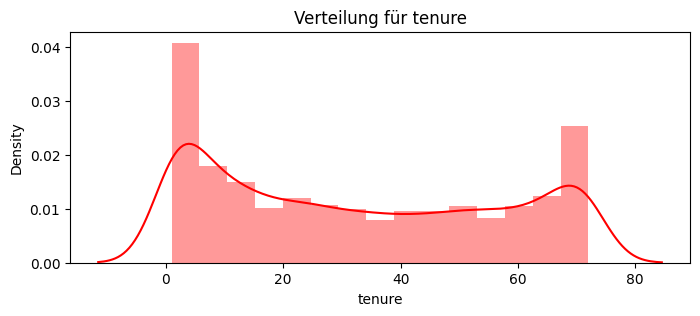

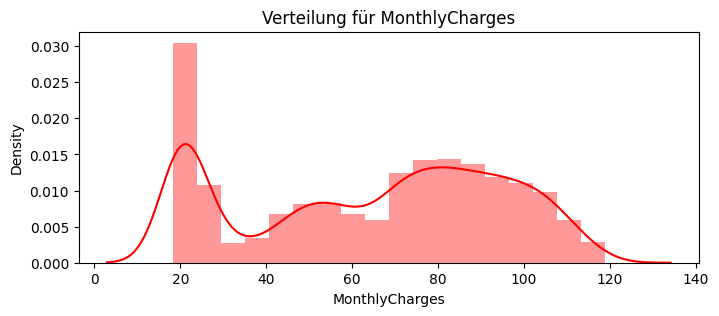

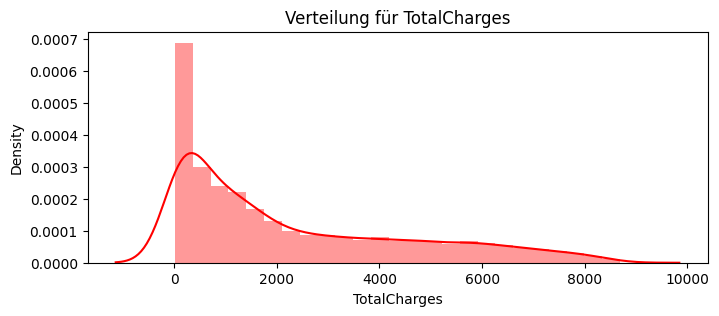

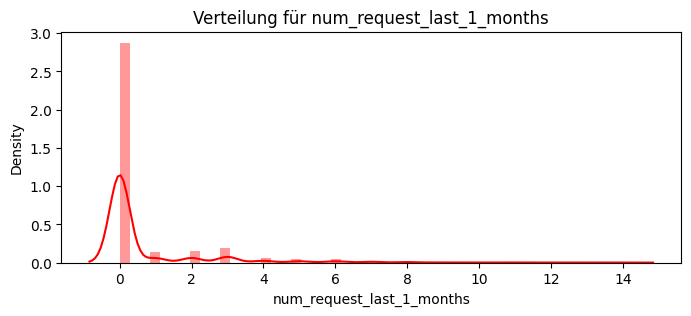

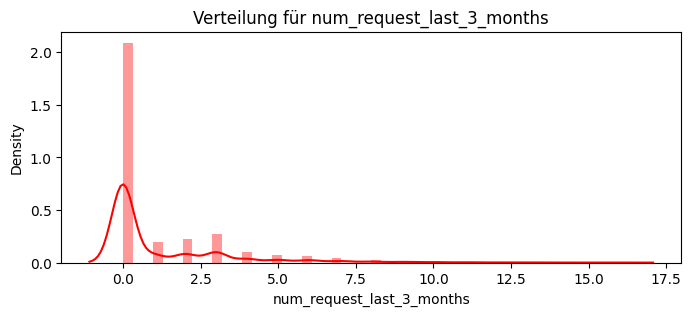

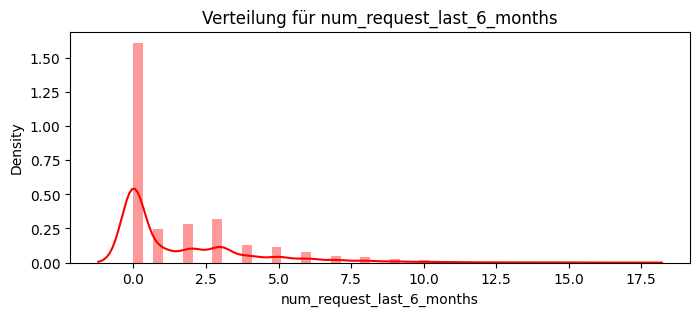

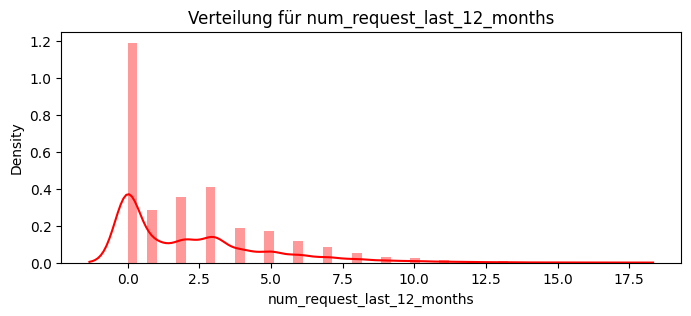

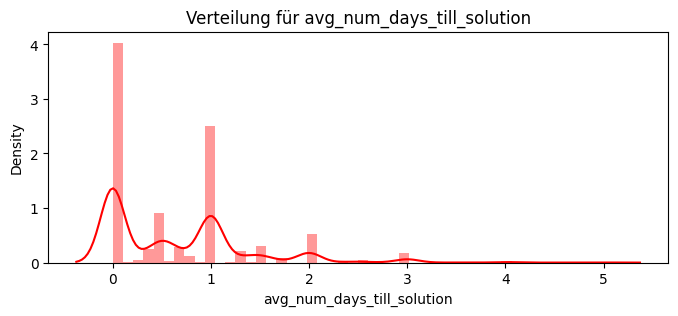

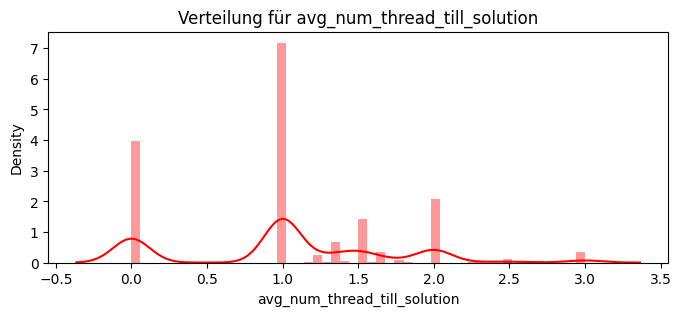

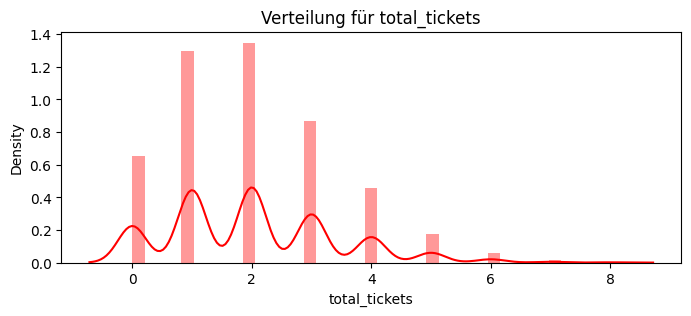

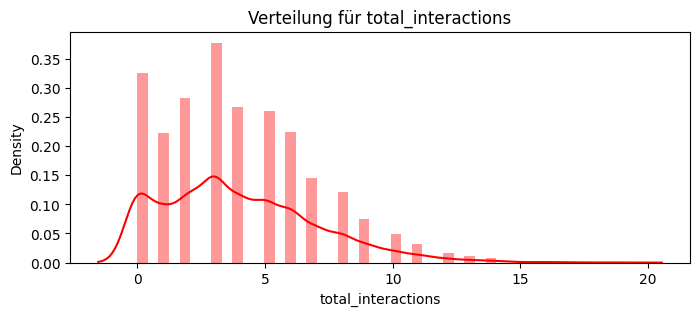

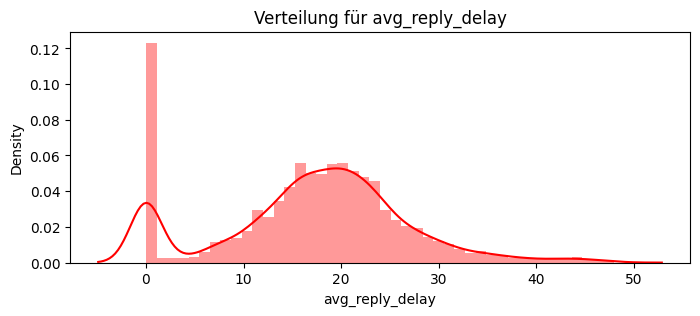

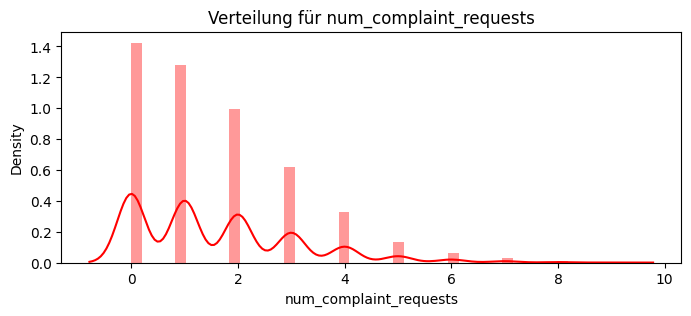

In [94]:
for feat in numeric_final_cols: 
    distplot(feat, df_final)

### Überlegung: Welchen Scaler sollte ich nutzen? 
Da die numerischen Features über verschiedene Wertebereiche (value ranges) verteilt sind, nutzen wir hier den Standard Scalar, um sie alle auf den gleichen Bereich runterzuskalieren.

## Normalisiere die numerischen Attribute

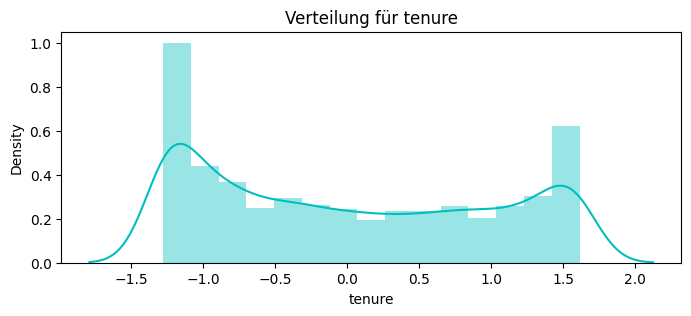

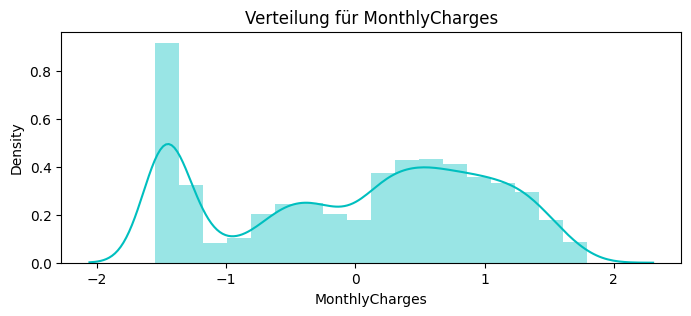

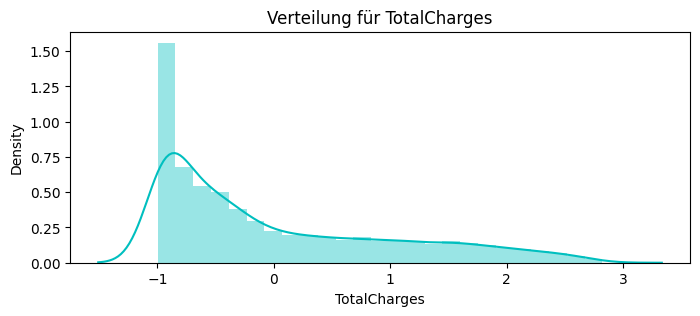

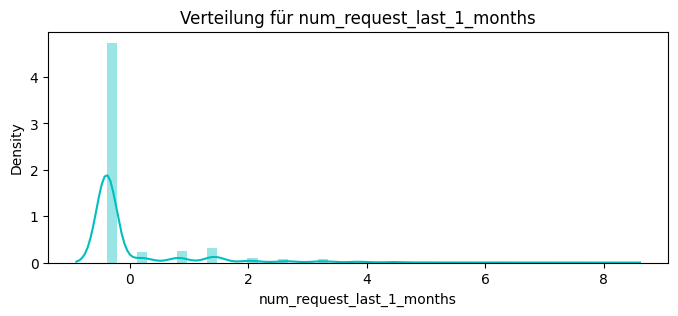

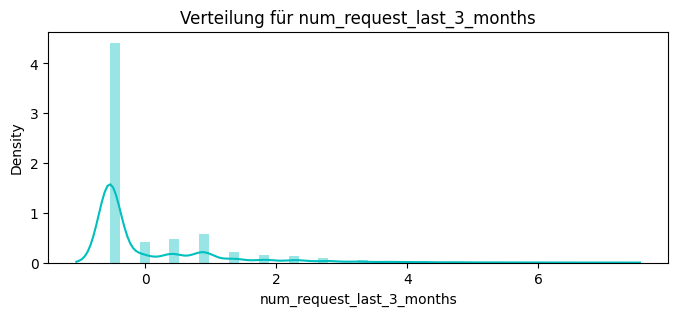

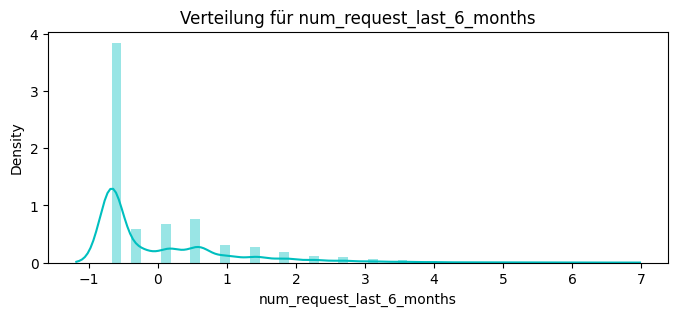

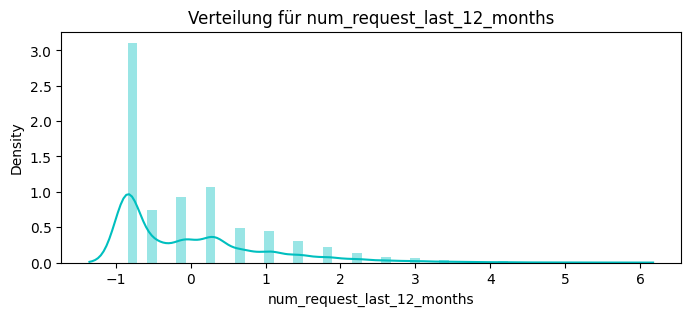

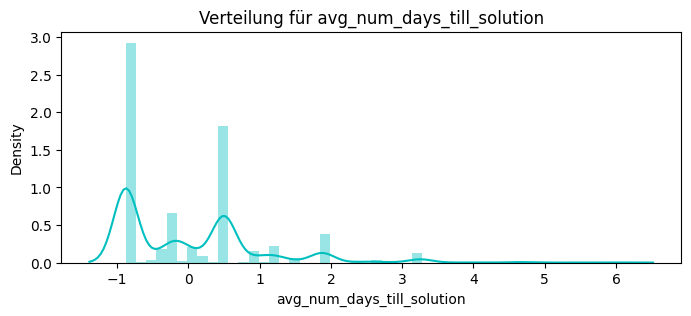

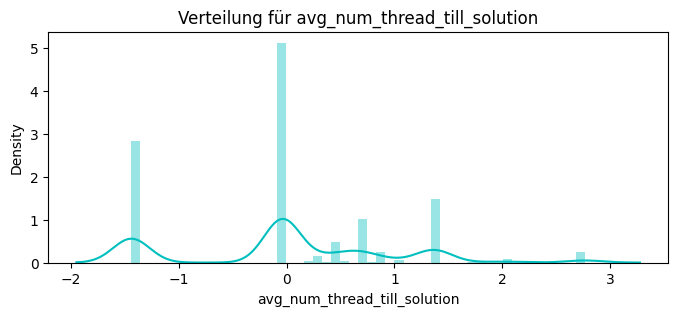

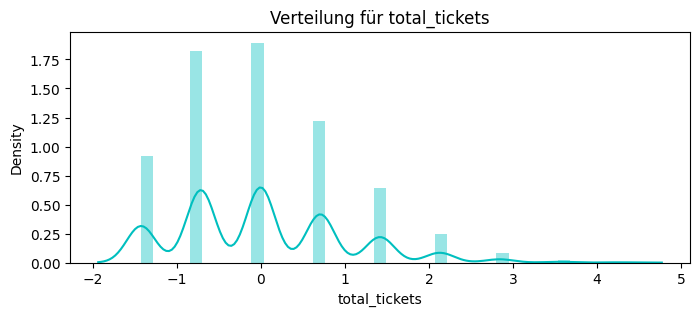

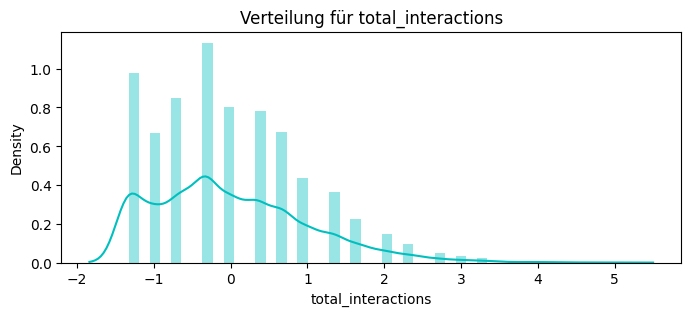

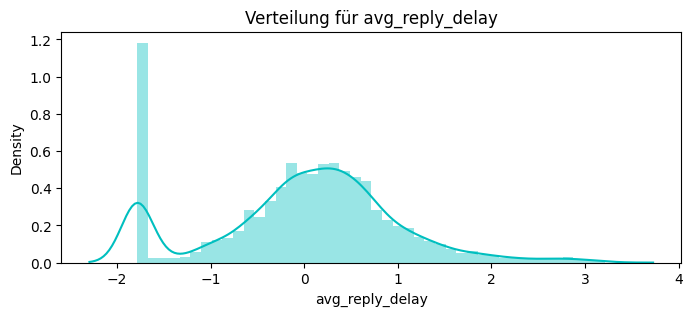

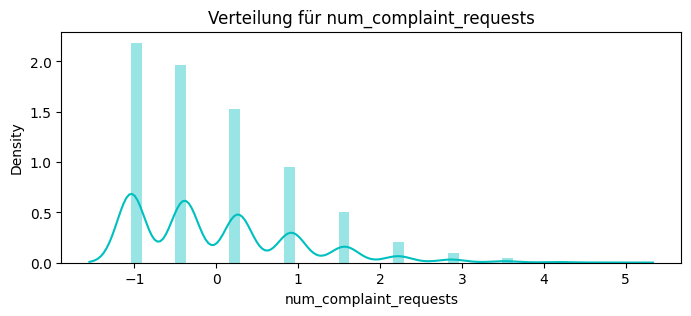

In [106]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df_final[numeric_final_cols].astype('float64')),
                       columns=numeric_final_cols)

for feat in numeric_final_cols: 
    distplot(feat, df_std, color='c')

In [107]:
scaler= StandardScaler()

X_train[numeric_final_cols] = scaler.fit_transform(X_train[numeric_final_cols])
X_test[numeric_final_cols] = scaler.transform(X_test[numeric_final_cols])

## Modellieren
Es handelt sich hierbei um einen Datensatz mit klar definierten Labels (Churn: Yes oder No), die eine Klassifikationsproblematik beschreiben. 

Dazu werden wir nun mehrere Klassifikationsmodelle testen.

### K-Nearest Neighbor Classifier

Der K-Nearest-Neighbor Classifier ist eine nichtparametrische Methode zur Schätzung von Wahrscheinlichkeitsdichtefunktionen, mehr Details: 
https://de.wikipedia.org/wiki/N%C3%A4chste-Nachbarn-Klassifikation

Hier nutzen wir die kNN-Implemtation von scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [108]:
# Initiere das knn-Modell
knn_model = KNeighborsClassifier(n_neighbors = 11) 

In [109]:
# Trainiere das Modell mit unseren Trainingsdaten
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [110]:
# die "score"-Funktion scoret direkt die predicted Resultate vom X_test gegen die wahren y-Werte und gibt die Accuracy zurück
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:",accuracy_knn)
print(knn_model.score(X_test,y_test))

KNN accuracy: 0.7630331753554502
0.7630331753554502


In [125]:
# Alternativ kann man direkt mit dem Modell auf den X_test (Testdatensatz) vorhersagen und diese Vorhersagen gegen die wahren Werte des Testdatensatzes mit sklearn evaluieren
y_pred = knn_model.predict(X_test)

prec = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print(f"Precision for class 0: {prec[0]}, precision for class 1: {prec[1]}")
print(f"Recall for class 0: {recall[0]}, recall for class 1: {recall[1]}")


Precision for class 0: 0.799543118218161, precision for class 1: 0.584958217270195
Recall for class 0: 0.9038089089735313, recall for class 1: 0.37433155080213903


In [124]:
prec = precision_score(y_test, y_pred, pos_label=1)
print(prec)
recall = recall_score(y_test, y_pred, pos_label=1)
print(recall)

0.584958217270195
0.37433155080213903


In [126]:
# Zudem gibt es den "Classification Report", der direkt mehrere Metriken Resultate ausgibt

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1549
           1       0.58      0.37      0.46       561

    accuracy                           0.76      2110
   macro avg       0.69      0.64      0.65      2110
weighted avg       0.74      0.76      0.74      2110



### Logistic Regression Classifier

Der Logistic Regression Classifier basiert auf Linear Regression, nur gibt sie am Ende eine 


In [128]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7805687203791469


In [129]:
# Make predictions
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



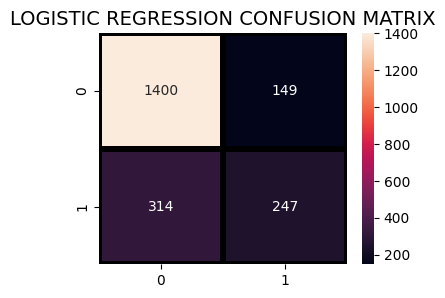

In [130]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

### Decision Tree Classifier¶


In [163]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7018957345971564


In [164]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1549
           1       0.44      0.48      0.46       561

    accuracy                           0.70      2110
   macro avg       0.62      0.63      0.63      2110
weighted avg       0.71      0.70      0.71      2110



### AdaBoost Classifier¶


In [133]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7838862559241706

In [134]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



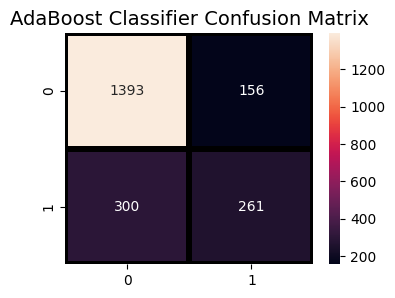

In [135]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Gradient Boosting Classifier¶



In [136]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.7805687203791469


In [137]:
print(classification_report(y_test, gb_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.45      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



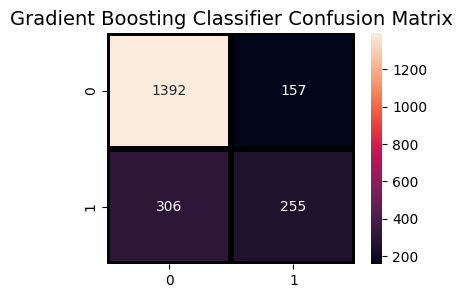

In [138]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()


### Voting Classifier

Der Voting Classifier ist ein Mixture Modell, der mehrere Modelle vereint, die alle ihre Predictions machen und dann über Majority voting entschieden wird, welche Prediction Output rausgegeben wird. 



In [139]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7834123222748816


In [140]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



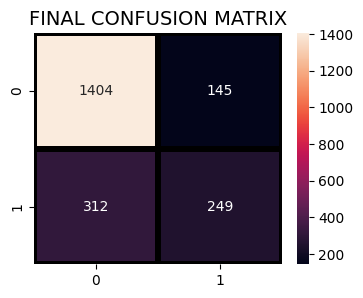

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

## Cross Validation Example! 

### Anhand eines einfachen Decision Trees


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
import numpy as np

In [144]:
# Annahme: X und y beinhalten jeweils deine Feature-Matrix und Zielvariable (Churn als 0/1)

dt_model = DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

#### Wähle k=10 für 10-fold Cross-Validation


In [145]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf

KFold(n_splits=10, random_state=42, shuffle=True)

#### Verwende cross_validate, um sowohl Trainings- als auch Validierungsscores zu erhalten


In [146]:
cv_results = cross_validate(dt_model, X, y, cv=kf, return_train_score=True)
cv_results

{'fit_time': array([0.05761695, 0.03229785, 0.03145909, 0.03202105, 0.03119683,
        0.03129601, 0.03146601, 0.03202415, 0.03087783, 0.03034687]),
 'score_time': array([0.00243187, 0.00079584, 0.00079393, 0.000844  , 0.00074506,
        0.00106907, 0.00075603, 0.00074768, 0.00071311, 0.00082994]),
 'test_score': array([0.71875   , 0.72585227, 0.6799431 , 0.71123755, 0.7083926 ,
        0.71123755, 0.71266003, 0.70697013, 0.68278805, 0.7140825 ]),
 'train_score': array([0.99968394, 0.99984197, 0.999842  , 0.99968399, 0.999842  ,
        0.99968399, 0.99968399, 0.99968399, 0.99968399, 0.99968399])}

#### Logge die Ergebnisse jeder einzelnen Fold


In [153]:
print("Trainings-Scores pro Fold:")
print(cv_results['train_score'])

Trainings-Scores pro Fold:
[0.99968394 0.99984197 0.999842   0.99968399 0.999842   0.99968399
 0.99968399 0.99968399 0.99968399 0.99968399]


In [154]:
print("Validierungs-Scores pro Fold:")
print(cv_results['test_score'])

Validierungs-Scores pro Fold:
[0.71875    0.72585227 0.6799431  0.71123755 0.7083926  0.71123755
 0.71266003 0.70697013 0.68278805 0.7140825 ]


In [155]:
print("Durchschnittlicher Validierungs-Score:")
print(np.mean(cv_results['test_score']))

Durchschnittlicher Validierungs-Score:
0.7071913794775636


### Next Step
Falls es sich hierbei um ein sehr einfaches Modell handelt ohne jegliche Parameter (z.B. linear Regression oder logistic Regression), könnte man nun das Modell mit dem besten Validierungs-Score extrahieren. 

### Cross-Validation
teilt die Daten auf und trainiert/evaluiert das Modell mehrfach (k-fach).

### Komplexere Modelle?

Wenn es sich um ein komplexeres Modell mit Hyperparameter handelt, kann sie helfen für das jeweilge Set an Hyperparameter eine robuste Performance-Metrik zu erhalten – sie ändert aber nicht selbst die Hyperparameter.


### Hyperparameter-Tuning (z. B. mit GridSearchCV)

**Hyperparameter-Tuning** (z. B. mit GridSearchCV) verwendet **CV (Cross-Validation)**, um verschiedene Hyperparameter-Kombinationen zu vergleichen, und wählt so die optimale Konfiguration.

In [156]:
# Beispiel anhand Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [158]:
# Definiere den Parameterbereich
param_grid = {
    'max_depth': [None, 3, 5, 10, 20], # default=None 
    'min_samples_split': [2, 5, 10]  # default=2, notwendige Anzahl an data points in einem Knoten, fürs weitere Teilen dieses Knoten
}
param_grid

{'max_depth': [None, 3, 5, 10, 20], 'min_samples_split': [2, 5, 10]}

In [160]:
# GridSearchCV kombiniert CV mit dem Hyperparameter-Tuning
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [162]:
# Beste Parameter und entsprechender Score
print("Beste Parameter:", grid_search.best_params_)
print("Bester CV-Score:", grid_search.best_score_)

Beste Parameter: {'max_depth': 5, 'min_samples_split': 10}
Bester CV-Score: 0.7841268750808223


In [167]:
# Das finale Modell (trainiert auf den gesamten Daten mit den besten Parametern)
best_model = grid_search.best_estimator_

In [170]:
y_pred_best = best_model.predict(X_test)


acc_best = accuracy_score(y_test, y_pred_best)
print(acc_best)

prec_best = precision_score(y_test, y_pred_best, pos_label=1)
print(prec_best)

recall_best = recall_score(y_test, y_pred_best, pos_label=1)
print(recall_best)

0.7341232227488151
0.0
0.0


In [176]:
1 in y_test

True

In [178]:
1 in y_pred

True

In [181]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

### Accuracy wurde genutzt - was wenn wir precision nutzen wollen?

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [None, 3, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                           cv=10, scoring='precision', refit=True)
grid_search.fit(X, y)

print("Beste Parameter:", grid_search.best_params_)
print("Bester CV-Precision-Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Beste Parameter: {'max_depth': 3, 'min_samples_split': 2}
Bester CV-Precision-Score: 0.6475320963134508


In [184]:
y_pred_best = best_model.predict(X_test)


acc_best = accuracy_score(y_test, y_pred_best)
print(acc_best)

prec_best = precision_score(y_test, y_pred_best, pos_label=1)
print(prec_best)

recall_best = recall_score(y_test, y_pred_best, pos_label=1)
print(recall_best)

0.7341232227488151
0.0
0.0


### Können wir mehrere Metriken gleichzeitig überwachen?

In [185]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [None, 3, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

scoring = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1)
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                           cv=10, scoring=scoring, refit='precision')  # refit='precision' lässt das finale Modell auf den besten Precision-Score ausgewählen.
grid_search.fit(X, y)

# Es werden alle Scores zurückgegeben:
cv_results = grid_search.cv_results_
print("Beste Parameter:", grid_search.best_params_)
print("Bester CV-Precision-Score:", grid_search.best_score_)

# Die Ergebnisse aller Folds (z.B. Precision und Recall) kannst du so ausgeben:
for mean_score, params in zip(cv_results['mean_test_precision'], cv_results['params']):
    print(f"Params: {params} - Mean Precision: {mean_score:.4f}")

best_model = grid_search.best_estimator_

Beste Parameter: {'max_depth': 3, 'min_samples_split': 2}
Bester CV-Precision-Score: 0.6475320963134508
Params: {'max_depth': None, 'min_samples_split': 2} - Mean Precision: 0.4583
Params: {'max_depth': None, 'min_samples_split': 5} - Mean Precision: 0.4630
Params: {'max_depth': None, 'min_samples_split': 10} - Mean Precision: 0.4820
Params: {'max_depth': 3, 'min_samples_split': 2} - Mean Precision: 0.6475
Params: {'max_depth': 3, 'min_samples_split': 5} - Mean Precision: 0.6475
Params: {'max_depth': 3, 'min_samples_split': 10} - Mean Precision: 0.6475
Params: {'max_depth': 5, 'min_samples_split': 2} - Mean Precision: 0.6353
Params: {'max_depth': 5, 'min_samples_split': 5} - Mean Precision: 0.6356
Params: {'max_depth': 5, 'min_samples_split': 10} - Mean Precision: 0.6351
Params: {'max_depth': 10, 'min_samples_split': 2} - Mean Precision: 0.5572
Params: {'max_depth': 10, 'min_samples_split': 5} - Mean Precision: 0.5556
Params: {'max_depth': 10, 'min_samples_split': 10} - Mean Precision:

In [186]:
y_pred_best = best_model.predict(X_test)


acc_best = accuracy_score(y_test, y_pred_best)
print(acc_best)

prec_best = precision_score(y_test, y_pred_best, pos_label=1)
print(prec_best)

recall_best = recall_score(y_test, y_pred_best, pos_label=1)
print(recall_best)

0.7341232227488151
0.0
0.0


### Vorhergesagte Wahrscheinlichkeit (anstatt der zugeteilten Klasse)

Viele Klassifikationsmodelle in scikit-learn bieten die Methode predict_proba(), mit der wir die Wahrscheinlichkeit für jeden Datenpunkt und jede Klasse abrufen können. 

Bei einem binären Klassifikationsmodell liefert predict_proba() ein Array der Form (n_samples, 2), wobei die zweite Spalte (Index 1) die Wahrscheinlichkeit für Klasse 1 enthält.


In [191]:
# Hole die Wahrscheinlichkeiten für den Testdatensatz
y_prob = best_model.predict_proba(X_test)
y_prob

array([[0.56528926, 0.43471074],
       [0.56528926, 0.43471074],
       [0.56528926, 0.43471074],
       ...,
       [0.56528926, 0.43471074],
       [0.56528926, 0.43471074],
       [0.56528926, 0.43471074]])

In [190]:
# Extrahiere die Wahrscheinlichkeit für Klasse 1
y_prob_class1 = y_prob[:, 1]
y_prob_class1

array([0.43471074, 0.43471074, 0.43471074, ..., 0.43471074, 0.43471074,
       0.43471074])

In [192]:
# Definiere einen eigenen Schwellenwert (Threshold)
threshold = 0.3  # Beispiel: 30% statt des üblichen 0.5

# Wende den Threshold an: Werte >= threshold werden als 1 klassifiziert, ansonsten als 0.
y_pred_custom = (y_prob_class1 >= threshold).astype(int)

In [193]:
# Evaluation der angepassten Vorhersagen:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_custom, pos_label=1))

Accuracy: 0.26587677725118486
Precision: 0.26587677725118486
Recall: 1.0
